In [8]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
import warnings
import logging
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [9]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl
from src.fetcher import WorldBankDataFetcher


In [11]:
sys.path.append(os.path.abspath("../"))

# Now import your scripts
#from scripts.eda import check_missing_values, check_duplicates, check_outliers,check_stationarity, save_cleaned_data

from scripts.visulaizer import plot_historical_prices,plot_rolling_statistics,plot_price_trend_over_years,plot_with_events,plot_time_series_decomposition,plot_smoothed_probabilities
from scripts.analyzer import analyze_events,preprocess_data,fit_markov_switching_model,process_data
from scripts.oil_price_analysis import analyze_indicators
from scripts.AdaptingModel import PricePredictor


#from scripts.logger import logger

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
logger = logging.getLogger('EDA Logger')
logger.setLevel(logging.DEBUG)

In [ ]:
# load the data
data = dl.load_data("BrentOilPrices.csv")
print("head of the BrentOilPrices ")
data.head()

head of the BrentOilPrices 


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")





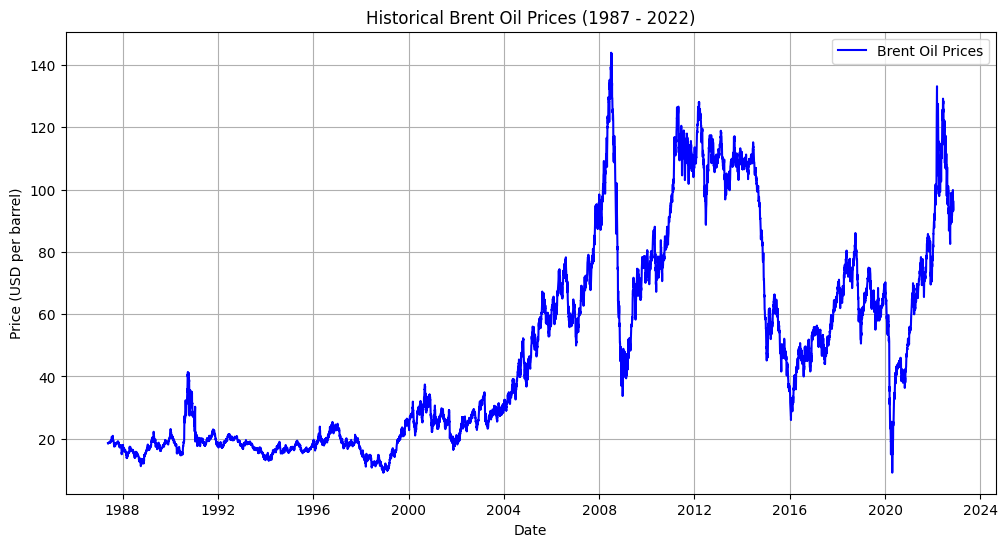

In [ ]:
# Plot historical prices
plot_historical_prices(data)

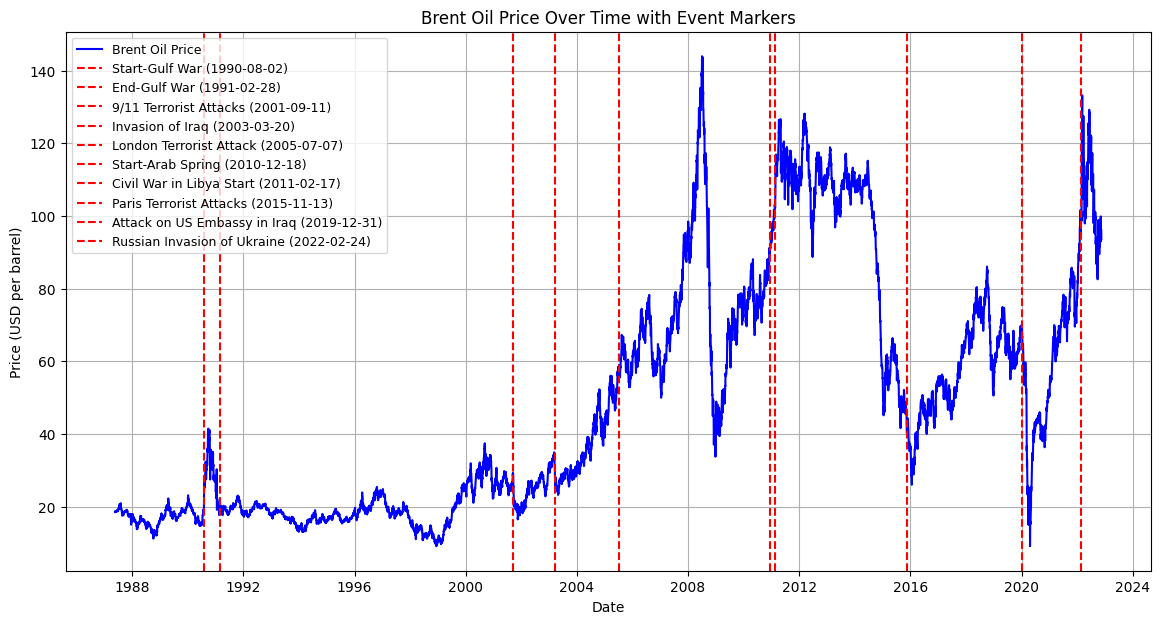

In [ ]:

plot_with_events(data)


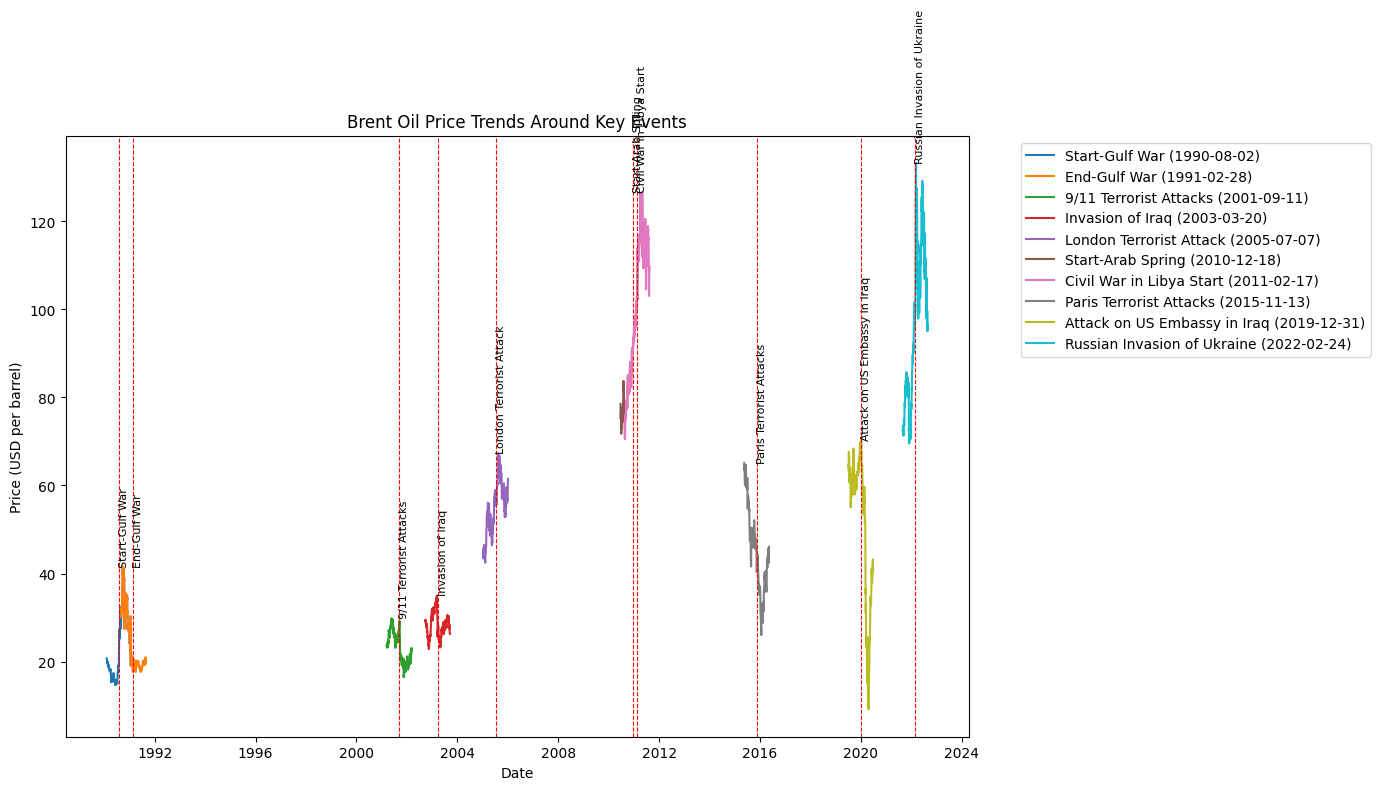

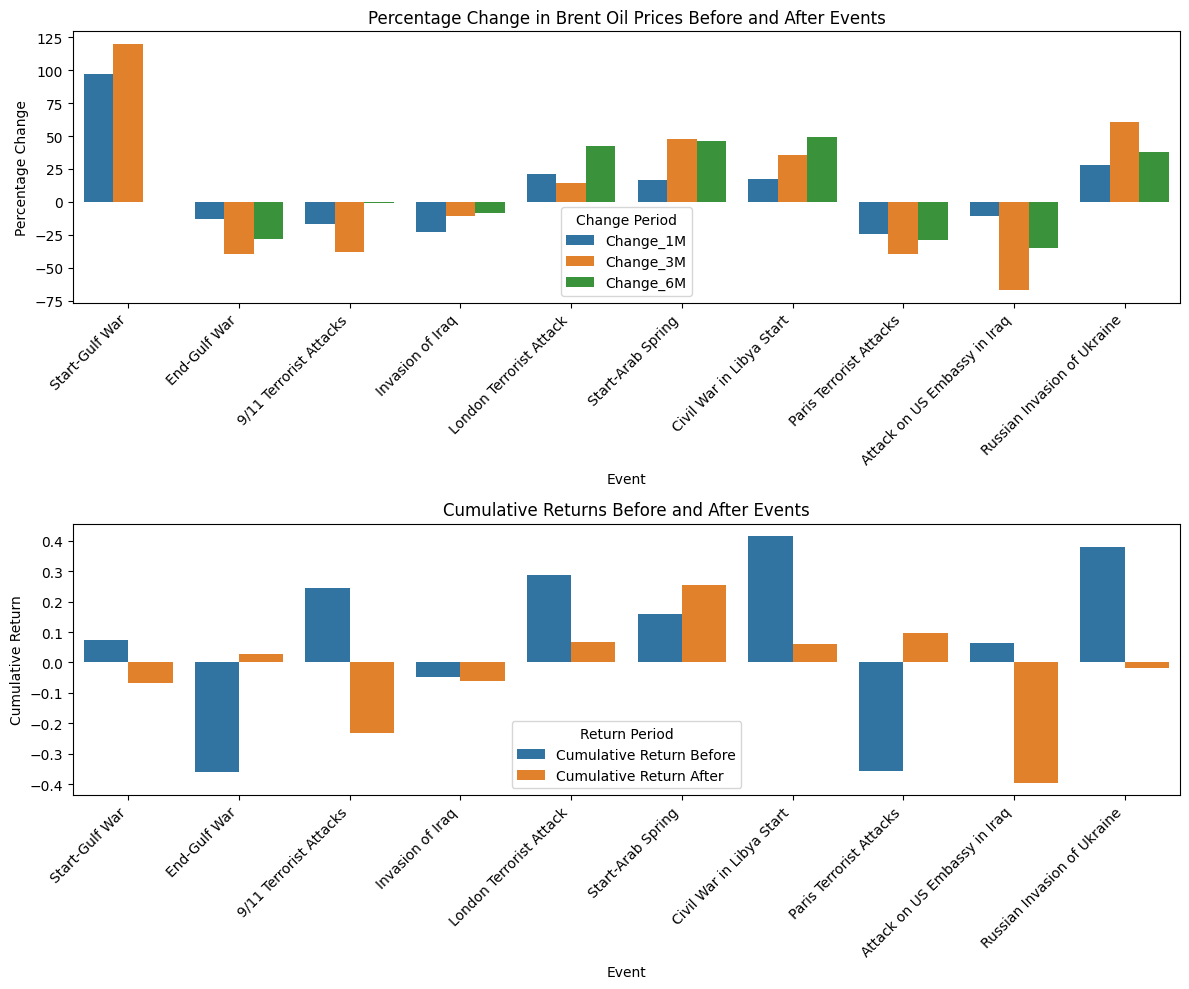


T-Test Results:
                              t-statistic       p-value
Start-Gulf War                 -27.384784  2.357071e-77
End-Gulf War                    17.150966  3.223485e-44
9/11 Terrorist Attacks          22.481413  3.700638e-62
Invasion of Iraq                 5.687661  3.546628e-08
London Terrorist Attack        -18.089887  1.663445e-47
Start-Arab Spring              -28.609274  2.278199e-80
Civil War in Libya Start       -31.381649  5.567102e-88
Paris Terrorist Attacks         20.413657  2.990119e-55
Attack on US Embassy in Iraq    14.444063  7.323658e-35
Russian Invasion of Ukraine    -27.835689  2.075132e-78


In [ ]:
# Call the function
analyze_events(data)

In [ ]:
# Preprocess the data
diff_data = process_data(data)

# Fit the model
results = fit_markov_switching_model(diff_data)
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                         Markov Switching Model Results                         
Dep. Variable:                    Price   No. Observations:                 9009
Model:             MarkovAutoregression   Log Likelihood              -14238.905
Date:                  Mon, 24 Feb 2025   AIC                          28491.809
Time:                          21:25:12   BIC                          28541.551
Sample:                               0   HQIC                         28508.734
                                 - 9009                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0281      0.040      0.700      0.484      -0.051       0.107
ar.L1         -0.8594      0.059    

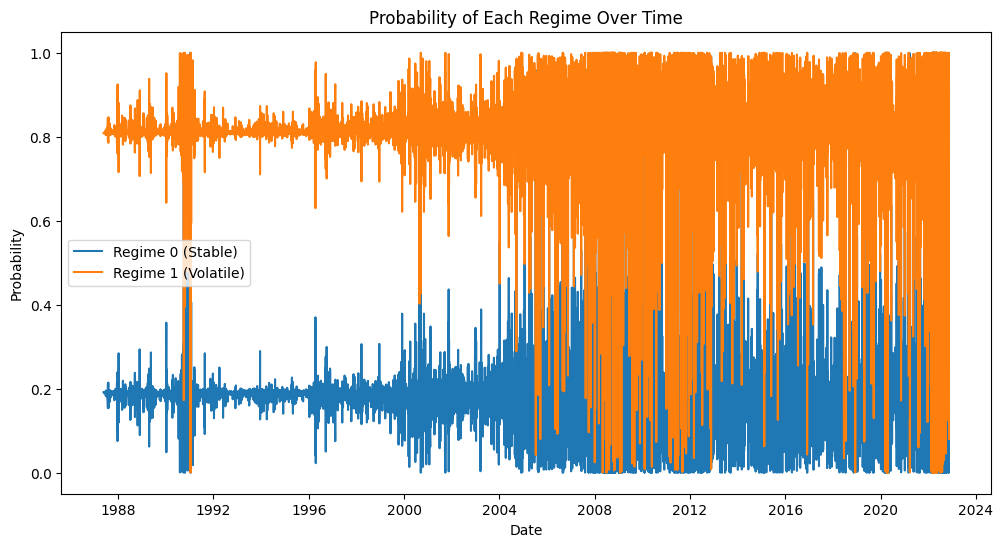

In [ ]:
# Plot the smoothed probabilities
plot_smoothed_probabilities(results, diff_data)

In [ ]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
import sys
sys.modules.pop('scripts.analyzer')
from scripts.analyzer import build_lstm_model, train_model, evaluate_model, preprocess_data


In [ ]:
# Preprocess the data for LSTM
X_train, y_train, X_test, y_test, scaler, train_size, time_step = preprocess_data(data)

In [ ]:

model = build_lstm_model(input_shape=(X_train.shape[1], 1))

In [ ]:
train_model(model, X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0078
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.1021e-04
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.9621e-04
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.6048e-04
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.0280e-04
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.9099e-04
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8517e-04
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.8723e-04
Epoch 9/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.3633e-04
Epoch 10/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.0936e-04


In [ ]:
predictions, mse, rmse, mae = evaluate_model(model, X_test, y_test, scaler)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Mean Squared Error (MSE): 4.56905280251007
Root Mean Squared Error (RMSE): 2.1375342810140077
Mean Absolute Error (MAE): 1.580175336625354


In [ ]:
!pip install wbdata

In [ ]:
# Import the WorldBankDataFetcher class


# Define your indicators
indicators = {
    'NY.GDP.MKTP.CD': {'name': 'GDP', 'country': 'WLD'},
    'FP.CPI.TOTL.ZG': {'name': 'CPI', 'country': 'WLD'},
    'SL.UEM.TOTL.ZS': {'name': 'Unemployment_Rate', 'country': 'WLD'},
    'PA.NUS.FCRF': {'name': 'Exchange_Rate', 'country': 'EMU'}
}

# Initialize the fetcher
fetcher = WorldBankDataFetcher('1987-05-20', '2022-11-14')

# Fetch, process, and save data for each indicator
for indicator_code, info in indicators.items():
    raw_data = fetcher.fetch_indicator_data(indicator_code, info['name'], info['country'])
    processed_data = fetcher.process_data(raw_data, info['name'])
    if not processed_data.empty:
        fetcher.save_data(processed_data, info['name'])
processed_data.to_csv("data/CPI_cleaned_data_daily.csv", index=False)

# Now you can load and use the saved data in your notebook

import pandas as pd

gdp_data = pd.read_csv('data/GDP_cleaned_data_daily.csv')
cpi_data = pd.read_csv('data/CPI_cleaned_data_daily.csv')
unemployment_data = pd.read_csv('data/Unemployment_Rate_cleaned_data_daily.csv')
exchange_rate_data = pd.read_csv('data/Exchange_Rate_cleaned_data_daily.csv')

2025-02-24 21:26:00,477 - WARNING - /etc/timezone is deprecated on Debian, and no longer reliable. Ignoring.


Data loaded successfully!


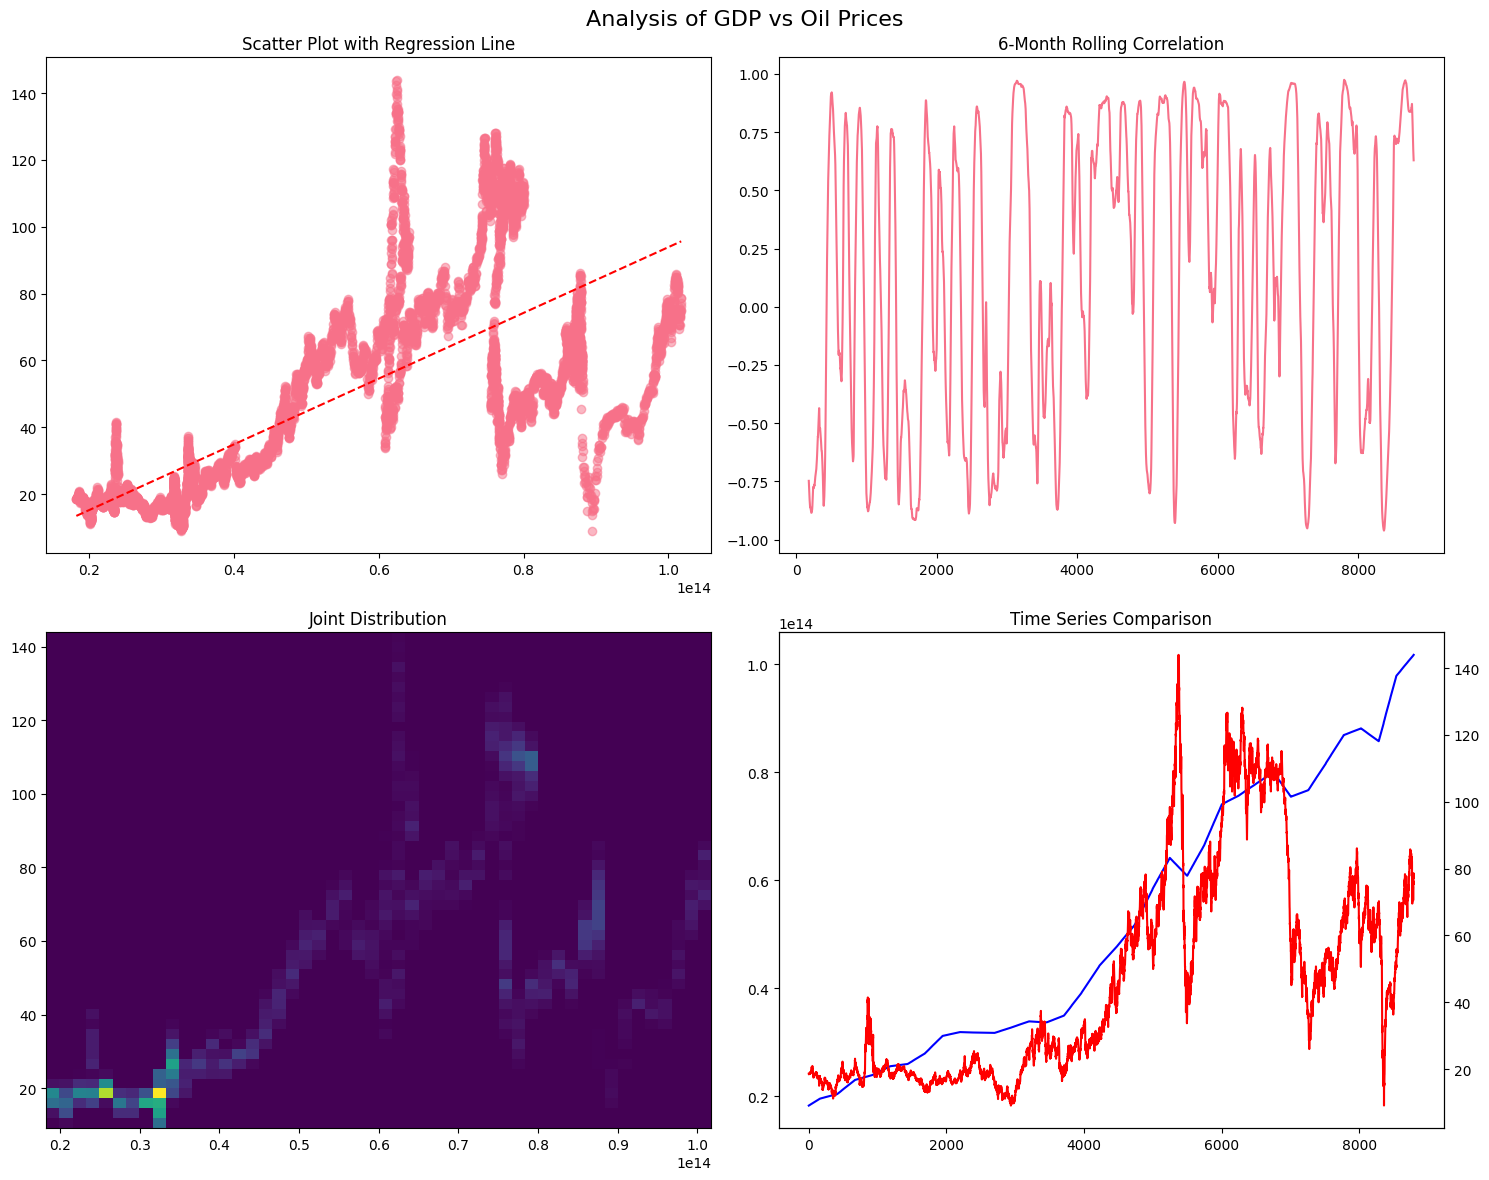

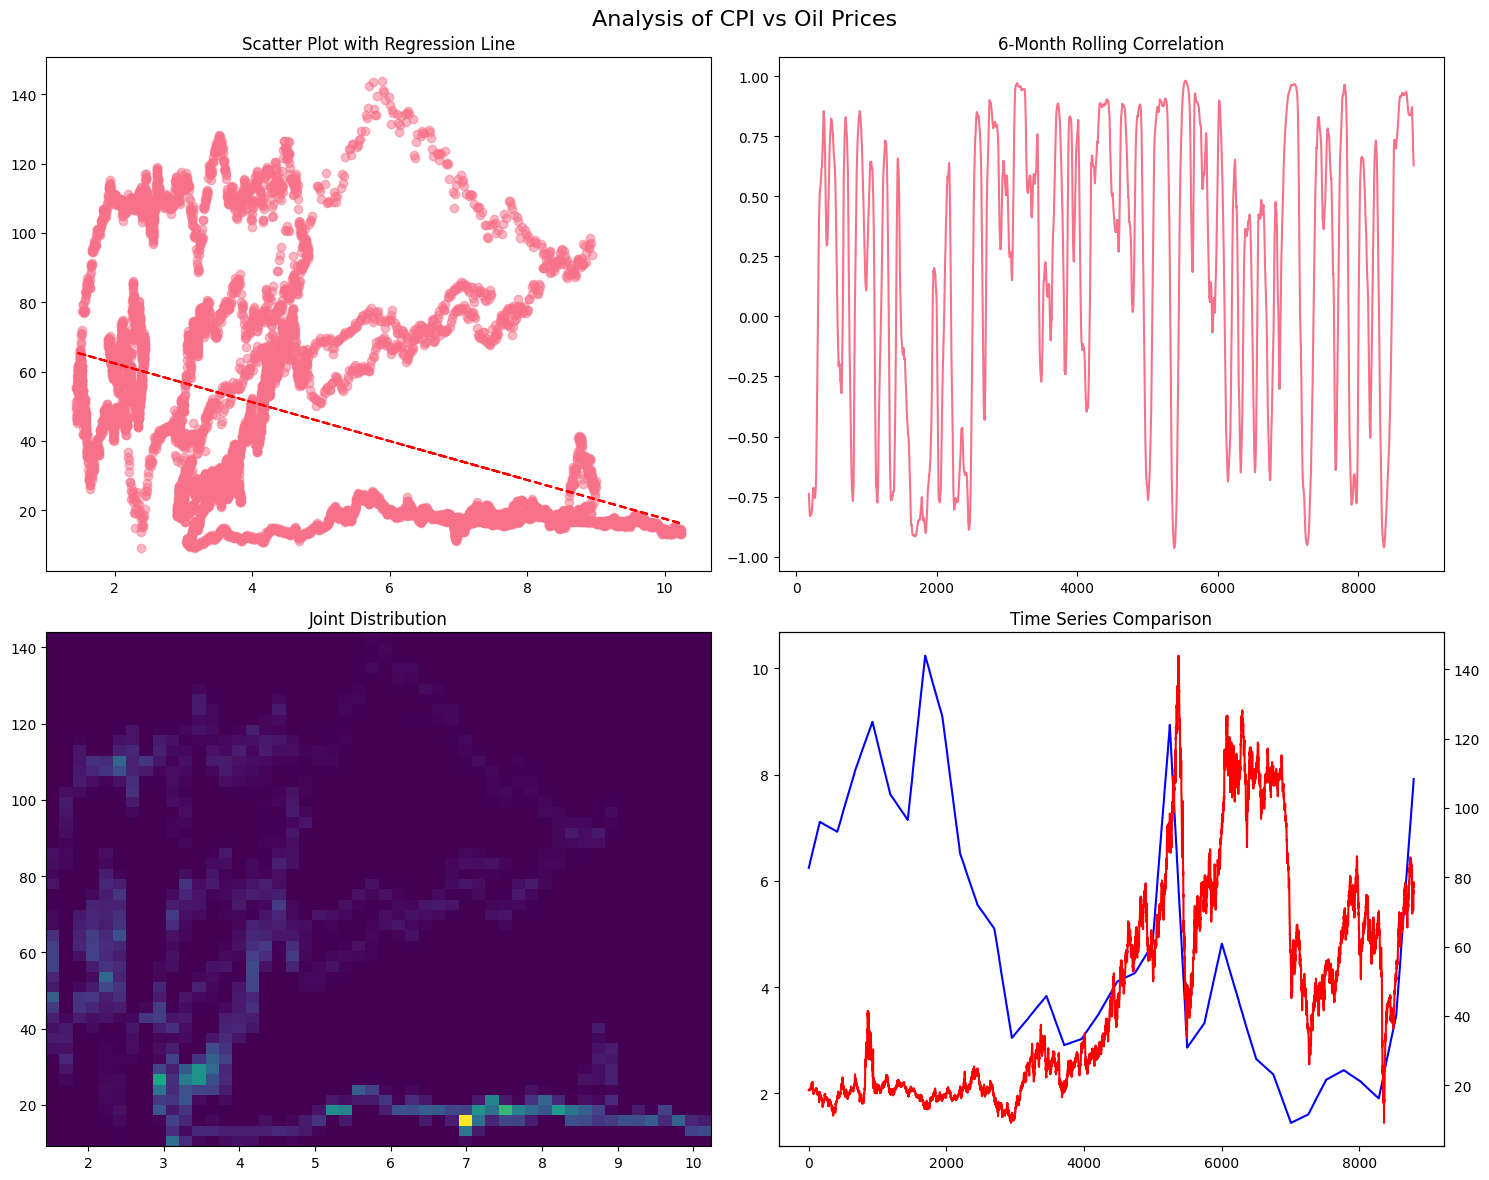

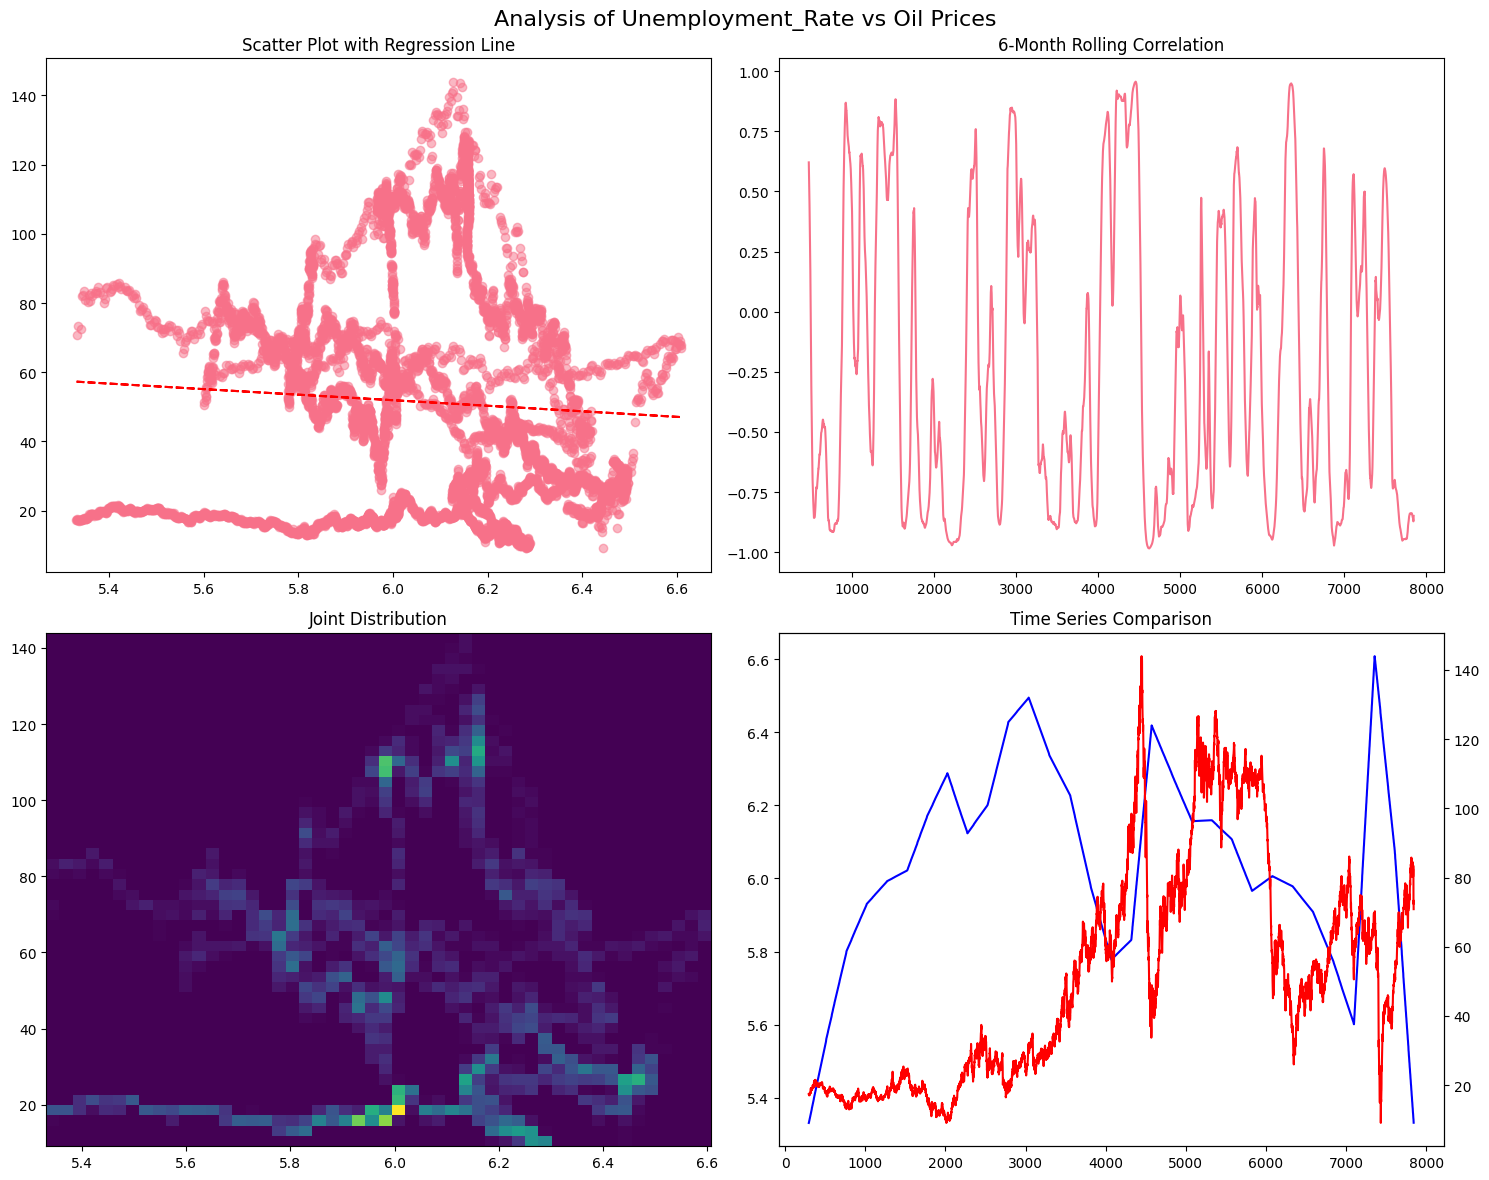

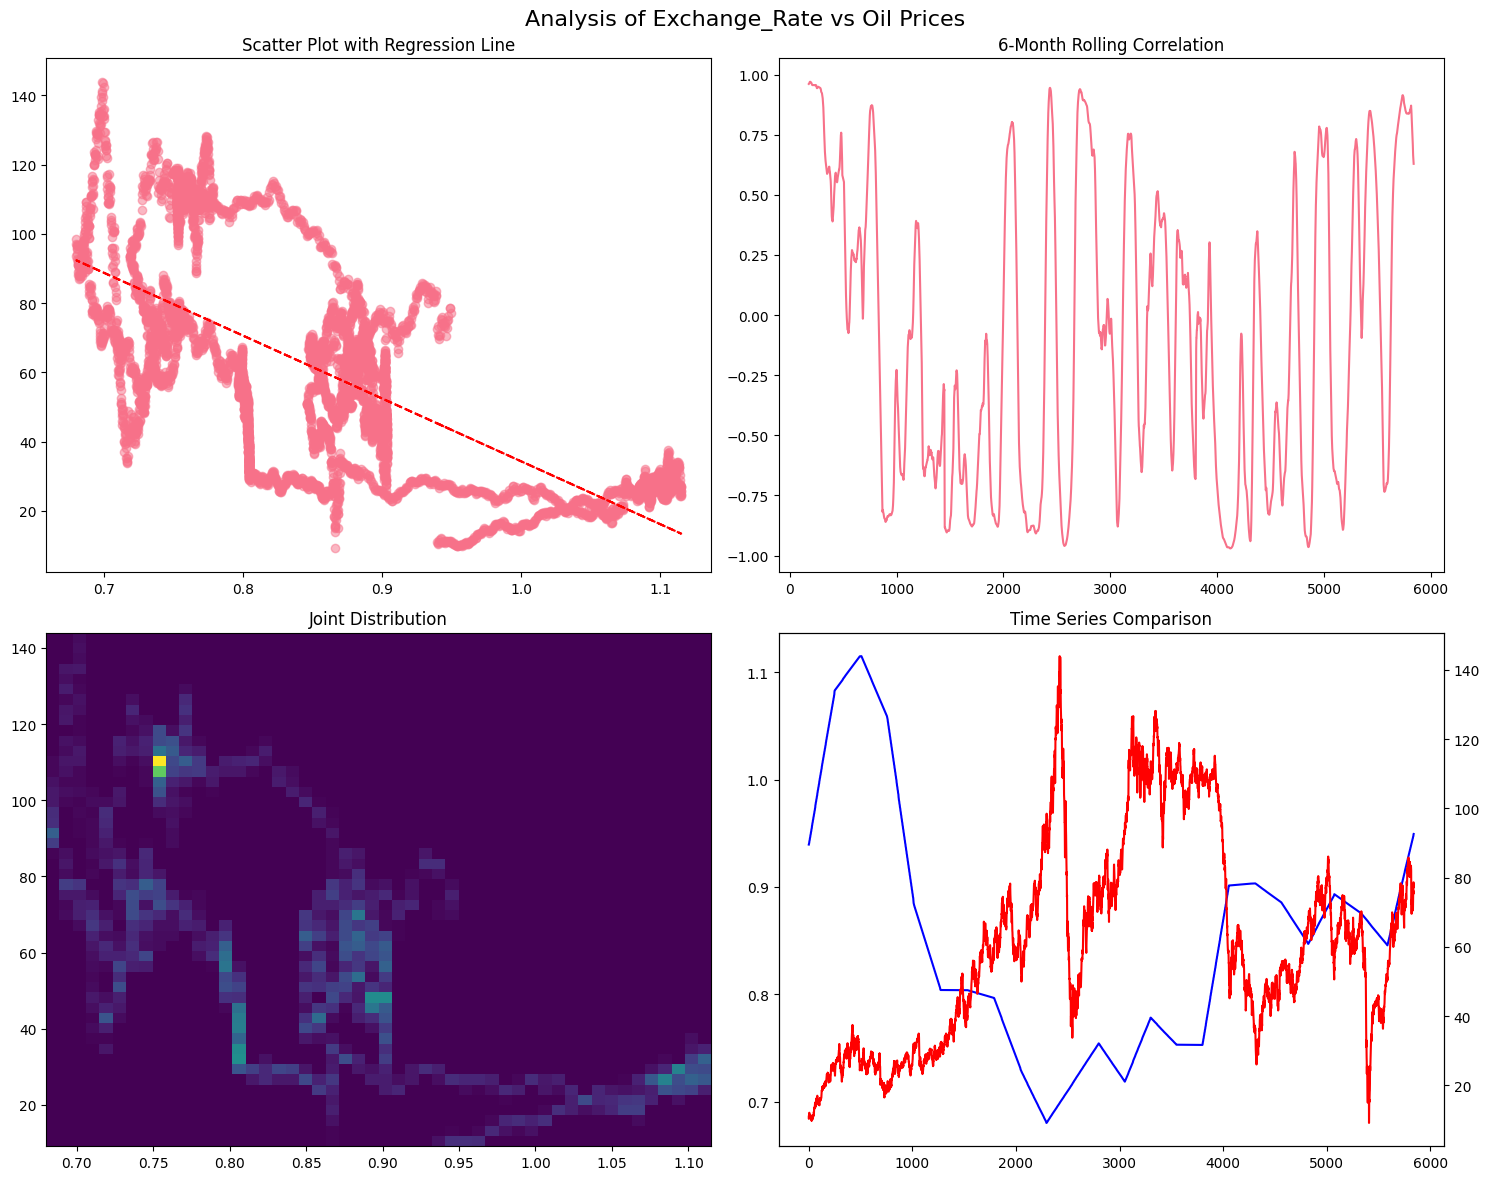

In [ ]:
sys.path.append(os.path.abspath("../"))



# Load the data
try:
    gdp_data_daily = pd.read_csv("data/GDP_cleaned_data_daily.csv")
    gdp_data_daily['Date'] = pd.to_datetime(gdp_data_daily['Date'])

    cpi_data_daily = pd.read_csv("data/CPI_cleaned_data_daily.csv")
    cpi_data_daily['Date'] = pd.to_datetime(cpi_data_daily['Date'])

    unemployment_data_daily = pd.read_csv("data/Unemployment_Rate_cleaned_data_daily.csv")
    unemployment_data_daily['Date'] = pd.to_datetime(unemployment_data_daily['Date'])

    exchange_rate_data_daily = pd.read_csv("data/Exchange_Rate_cleaned_data_daily.csv")
    exchange_rate_data_daily['Date'] = pd.to_datetime(exchange_rate_data_daily['Date'])

    oil_data_daily = pd.read_csv("data/BrentOilPrices.csv")
    oil_data_daily['Date'] = pd.to_datetime(oil_data_daily['Date'])
    oil_data_daily.set_index('Date', inplace=True)

    print("Data loaded successfully!")

except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure all required CSV files are in the correct directory.")
    raise

# Run the analysis
if 'gdp_data_daily' in locals() and 'cpi_data_daily' in locals() and \
   'unemployment_data_daily' in locals() and 'exchange_rate_data_daily' in locals() and \
   'oil_data_daily' in locals():

    analyze_indicators(
        gdp_data_daily,
        cpi_data_daily,
        unemployment_data_daily,
        exchange_rate_data_daily,
        oil_data_daily
    )
else:
    print("Some required data files could not be loaded. Please check the data paths and file names.")

In [ ]:
# Initialize the predictor
predictor = PricePredictor()

# Load data
if predictor.load_data():
    # Train LSTM model
    predictor.train_lstm()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


LSTM Model Evaluation Metrics:
MSE: 2.9325
RMSE: 1.7125
MAE: 1.1792
R²: 0.9849
2025-02-24 21:28:06,501 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
